<a href="https://colab.research.google.com/github/naveen-pixel07/2025_ML/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target

# Filter to include only digits 0 and 1
X_filtered = X[(y == '0') | (y == '1')]
y_filtered = y[(y == '0') | (y == '1')]

print("Shape of filtered features:", X_filtered.shape)
print("Shape of filtered labels:", y_filtered.shape)

Shape of filtered features: (14780, 784)
Shape of filtered labels: (14780,)


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Flatten the image data if it's not already flattened
# X_filtered is already in shape (14780, 784), which is 2D and flattened.
# So no need to explicitly flatten it again.

# Scale the pixel values to a range between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Convert the filtered labels to numerical format (0 and 1)
y_numeric = y_filtered.astype(int)

print("Shape of scaled features:", X_scaled.shape)
print("Data type of numerical labels:", y_numeric.dtype)

Shape of scaled features: (14780, 784)
Data type of numerical labels: int64


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_numeric, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (11824, 784)
Shape of X_test: (2956, 784)
Shape of y_train: (11824,)
Shape of y_test: (2956,)


In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object with default parameters
model = LogisticRegression()

# Train the logistic regression model using the fit() method
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test features
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9997
Precision: 0.9994
Recall: 1.0000
F1-score: 0.9997


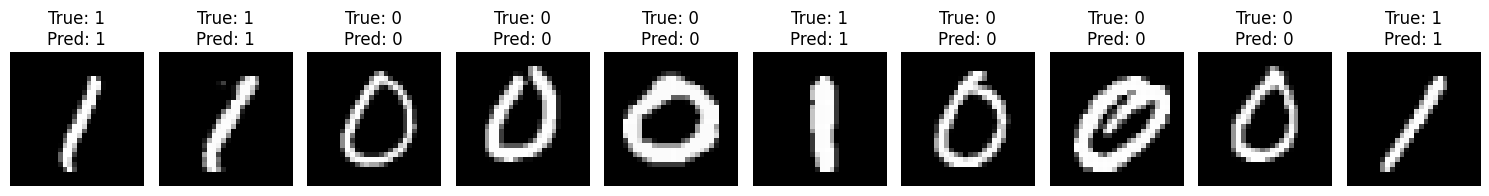

Predicted labels for this new set of visualized images:
[1 1 0 0 0 1 0 0 0 1]


In [11]:
import matplotlib.pyplot as plt
import random

# Select a new random subset of indices from the test set
num_visualize_another = 10  # You can adjust the number of images to visualize

# Ensure we don't pick the exact same random indices as before for variety
all_test_indices = list(range(len(X_test)))
available_indices = list(set(all_test_indices) - set(random_indices)) # Exclude previously used indices if possible

if len(available_indices) < num_visualize_another:
    # If there aren't enough new indices, just pick from the whole test set
    random_indices_another = random.sample(all_test_indices, num_visualize_another)
else:
    random_indices_another = random.sample(available_indices, num_visualize_another)


# Get these new random images and their true labels
X_random_test_another = X_test[random_indices_another]
y_random_test_another = y_test[random_indices_another]

# Make predictions on these new random images
y_random_pred_another = model.predict(X_random_test_another)

# Visualize the new random images and their predictions
plt.figure(figsize=(15, 5))
for i in range(num_visualize_another):
    plt.subplot(1, num_visualize_another, i + 1)
    plt.imshow(X_random_test_another[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_random_test_another[i]}\nPred: {y_random_pred_another[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Predicted labels for this new set of visualized images:")
print(y_random_pred_another)